## Problem Statement

Develope a ConvNet model that differentiate between 6 sign language digits

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. It allows much more flexibility, like a grap where the nodes of the layers can connect in many more ways than one.


In [16]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl

np.random.seed(1)

### Import Data

In [13]:
train_dataset = h5py.File('Signdataset/train_signs.h5', "r")
X_train_orig = np.array(train_dataset["train_set_x"][:]) # train set features
Y_train_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_dataset = h5py.File('Signdataset/test_signs.h5', "r")
X_test_orig = np.array(test_dataset["test_set_x"][:]) # test set features
Y_test_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

# the list of classes
classes = np.array(test_dataset["list_classes"][:]) 
print('Classes are:  ',classes)

Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

Classes are:   [0 1 2 3 4 5]


y = 5


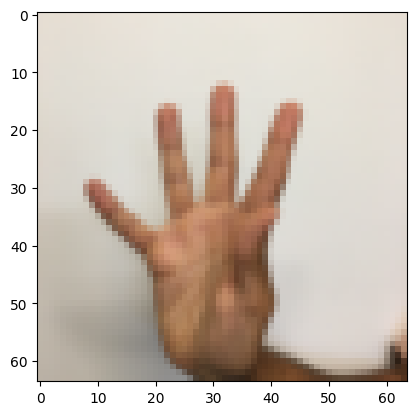

In [14]:
# Example of an image from the dataset
index = 12
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [15]:
# data processing
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

num_classes = len(classes)
Y_train = convert_to_one_hot(Y_train_orig, num_classes).T
Y_test = convert_to_one_hot(Y_test_orig, num_classes).T

# normalizing
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# data information
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


## Modeling

In [17]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model
    """
    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tf.keras.layers.Conv2D(filters = 8, kernel_size=(4,4), strides=(1,1), padding='same')(input_img)
    ## RELU
    A1 = tfl.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=(8,8),strides=(8,8),padding='same')(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(filters = 16, kernel_size=(2,2), strides=(1,1), padding='same')(P1)
    ## RELU
    A2 = tfl.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=(4,4),strides=(4,4),padding='same')(A2)
    ## FLATTEN
    F = tfl.Flatten()(P2)
    ## Dense layer
    ## 6 neurons in output layer with softmax activation
    outputs = tfl.Dense(units=6,activation='softmax')(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [18]:
conv_model = convolutional_model((64,64,3))
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

## Compiling Model

In [20]:
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



In [21]:
conv_model.fit(X_train, Y_train, epochs=100, batch_size=16)

Epoch 1/100
68/68 [==============================] - 0s 4ms/step - loss: 1.7934 - accuracy: 0.1815
Epoch 2/100
68/68 [==============================] - 0s 4ms/step - loss: 1.7727 - accuracy: 0.2176
Epoch 3/100
68/68 [==============================] - 0s 4ms/step - loss: 1.7463 - accuracy: 0.2935
Epoch 4/100
68/68 [==============================] - 0s 4ms/step - loss: 1.7102 - accuracy: 0.2907
Epoch 5/100
68/68 [==============================] - 0s 4ms/step - loss: 1.6507 - accuracy: 0.3676
Epoch 6/100
68/68 [==============================] - 0s 4ms/step - loss: 1.5629 - accuracy: 0.4463
Epoch 7/100
68/68 [==============================] - 0s 5ms/step - loss: 1.4760 - accuracy: 0.4407
Epoch 8/100
68/68 [==============================] - 0s 5ms/step - loss: 1.3783 - accuracy: 0.4843
Epoch 9/100
68/68 [==============================] - 0s 5ms/step - loss: 1.2904 - accuracy: 0.5111
Epoch 10/100
68/68 [==============================] - 0s 4ms/step - loss: 1.2266 - accuracy: 0.5417
Epoch 11/